![title](aid.png)

## <p style="text-align:center";>Test de connaissances Python - Niveau 1 </p>

Ce test a pour but d'évaluer vos connaissances du langage Python. Il se décompose en quatre parties :
*	Les bases (import, prétraitements, stats descriptives)
*	Data Management (rapprochement de tables, agrégats, filtres)
*	Dataviz
*	Question ouverte

Nous attendons la rédaction d'un code Pythonique pour les 3 premières parties. La partie 4 peut être rédigée en commentaire. Les candidats qui font les tests dans nos locaux ont 1h de délai pour le réaliser.


Citer précisément les technologies, packages, fonctions utilisées dans les solutions proposées.

In [2]:
import pandas as pnd
%matplotlib inline

## 1.	Les bases

### 1.1.	Importer les tables airline.csv et incidents.csv et donner un aperçu du contenu de ces tables.

In [3]:
df_airline = pnd.read_csv("airline2.csv", sep=";")
df_airline.head()

,FlightID,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,CRSElapsedTime,Origin,Dest,Distance
0,PNCWNJQB57933,1,3,4,1955,2225,WN,335,N712SW,150.0,IAD,TPA,810
1,NMPQUUQI43529,1,3,4,2130,2240,WN,378,N726SW,70.0,JAX,FLL,318
2,KDVUBNNF18766,1,3,4,1050,1325,WN,1636,N321SW,155.0,LAS,GEG,806
3,XTPYMZCH39538,1,3,4,1315,1755,WN,479,N622SW,160.0,LAS,OMA,1099
4,GGICWALI62866,1,3,4,2125,2225,WN,2211,N646SW,60.0,LAS,SAN,258


In [4]:
pnd.read_csv?

In [5]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
FlightID          100000 non-null object
Month             100000 non-null int64
DayofMonth        100000 non-null int64
DayOfWeek         100000 non-null int64
CRSDepTime        100000 non-null int64
CRSArrTime        100000 non-null int64
UniqueCarrier     100000 non-null object
FlightNum         100000 non-null int64
TailNum           98237 non-null object
CRSElapsedTime    99987 non-null float64
Origin            100000 non-null object
Dest              100000 non-null object
Distance          100000 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 9.9+ MB


In [6]:
df_airline_incidents = pnd.read_csv("airline2_incidents.csv", sep=";")
df_airline_incidents.head()

,flightID,DepTime,ArrTime,ActualElapsedTime,AirTime,ArrDelay,DepDelay,TaxiIn,TaxiOut,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,PNCWNJQB57933,754.0,1002.0,128.0,113.0,2.0,19.0,5.0,10.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,NMPQUUQI43529,1449.0,1715.0,146.0,134.0,-5.0,19.0,6.0,6.0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,KDVUBNNF18766,1851.0,2004.0,73.0,41.0,34.0,26.0,16.0,16.0,0,NaN,18.0,0.0,8.0,0.0,8.0
3,XTPYMZCH39538,1712.0,1914.0,62.0,48.0,84.0,87.0,4.0,10.0,0,NaN,6.0,0.0,0.0,0.0,78.0
4,GGICWALI62866,1505.0,1605.0,60.0,43.0,0.0,5.0,4.0,13.0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_airline_incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100030 entries, 0 to 100029
Data columns (total 16 columns):
flightID             100030 non-null object
DepTime              96782 non-null float64
ArrTime              96523 non-null float64
ActualElapsedTime    96523 non-null float64
AirTime              96523 non-null float64
ArrDelay             96523 non-null float64
DepDelay             96782 non-null float64
TaxiIn               96523 non-null float64
TaxiOut              96782 non-null float64
Cancelled            100030 non-null int64
CancellationCode     3248 non-null object
CarrierDelay         25848 non-null float64
WeatherDelay         25848 non-null float64
NASDelay             25848 non-null float64
SecurityDelay        25848 non-null float64
LateAircraftDelay    25848 non-null float64
dtypes: float64(13), int64(1), object(2)
memory usage: 12.2+ MB


### 1.2. Quantifier (si elles existent) le nombre de valeurs manquantes par jeu de données et par variable.

In [9]:
df_airline.isnull().sum()

FlightID             0
Month                0
DayofMonth           0
DayOfWeek            0
CRSDepTime           0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum           1763
CRSElapsedTime      13
Origin               0
Dest                 0
Distance             0
dtype: int64

In [10]:
df_airline_incidents.isnull().sum()

flightID                 0
DepTime               3248
ArrTime               3507
ActualElapsedTime     3507
AirTime               3507
ArrDelay              3507
DepDelay              3248
TaxiIn                3507
TaxiOut               3248
Cancelled                0
CancellationCode     96782
CarrierDelay         74182
WeatherDelay         74182
NASDelay             74182
SecurityDelay        74182
LateAircraftDelay    74182
dtype: int64

### 1.3.	Supprimer les lignes totalement vides

In [8]:
# nombre de valeurs nulles : aucune ligne à 13
df_airline.isnull().sum(axis=1).value_counts()

0    98224
1     1776
dtype: int64

In [9]:
# nombre de valeurs nulles : aucune ligne à 16
df_airline_incidents.isnull().sum(axis=1).value_counts()

6     70675
1     25848
13     3248
11      259
dtype: int64

In [16]:
df_airline = df_airline.dropna(axis=0, how='all')

In [16]:
df_airline.dropna(axis=0, how='all', inplace=True)

In [17]:
df_airline_incidents.dropna(axis=0, how='all', inplace=True)

### 1.4.	Construire une fonction NombreVol qui prend en arguments un mois, un jour, une structure de donnée et renvoie le nombre de vols qu'il y a eu à cette date. Si aucun vol n'a eu lieu, la fonction devra afficher : "Aucun vol ce jour là.". Appliquer cette fonction aux dates uniques de la table airline.

In [20]:
def nombreVol(mois, jour, df):
    nb = len(df.loc[(df["Month"] == mois)&(df["DayofMonth"] == jour)])
    if nb == 0:
        print("Aucun vol ce jour là.")
    else:
        return nb

In [21]:
nombreVol(1, 3, df_airline)

2584

In [22]:
nombreVol(1, 0, df_airline)

Aucun vol ce jour là.


In [24]:
var = df_airline[["Month", "DayofMonth"]].drop_duplicates()
var

,Month,DayofMonth
0,1,3
37,1,4
91,1,5
135,1,6
186,1,7
239,1,8
293,1,9
347,1,10
400,1,11
454,1,12


In [30]:
var["Nombre"] = var["Month"].combine(var["DayofMonth"], lambda x, y: nombreVol(x, y, df_airline))
var.sort_values(["Month", "DayofMonth"], inplace=True)
var.reset_index(drop=True)

,Month,DayofMonth,Nombre
0,1,1,2422
1,1,2,2579
2,1,3,2584
3,1,4,2585
4,1,5,2267
5,1,6,2503
6,1,7,2580
7,1,8,2467
8,1,9,2478
9,1,10,2541


### 1.5.	Compter le nombre d'annulation par motif A/B/C/D.

In [31]:
df_airline_incidents["CancellationCode"].value_counts()

B    1429
A    1107
C     712
Name: CancellationCode, dtype: int64

## 2.	Data Management

### 2.1.	Créer la table AllAirline qui pour chaque vol recense toutes les informations disponibles dans les tables en entrée.

In [34]:
all_airline = df_airline.set_index("FlightID").join(df_airline_incidents.set_index("flightID"))
all_airline.head()

,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,CRSElapsedTime,Origin,...,DepDelay,TaxiIn,TaxiOut,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
AAABHEIJ50851,1,6,7,1540,1655,XE,2248,N14158,75.0,EWR,...,29.0,12.0,30.0,0,NaN,53.0,0.0,0.0,0.0,0.0
AAAFYAUV23861,2,25,1,1220,1425,WN,968,N794SW,125.0,PDX,...,-1.0,12.0,33.0,0,NaN,0.0,0.0,20.0,0.0,0.0
AAAVRDXC97303,1,23,3,1219,1228,NW,974,N8986E,69.0,DTW,...,37.0,7.0,42.0,0,NaN,0.0,0.0,55.0,0.0,0.0
AAAXNTYF50728,1,30,3,1028,1342,US,75,N913AW,314.0,DCA,...,-4.0,5.0,9.0,0,NaN,NaN,NaN,NaN,NaN,NaN
AAAZFRET38132,1,2,3,1800,1855,US,897,N950UW,55.0,CLT,...,6.0,25.0,9.0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
all_airline = df_airline.merge(df_airline_incidents, left_on="FlightID", right_on="flightID")
all_airline.head()

,FlightID,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,CRSElapsedTime,...,DepDelay,TaxiIn,TaxiOut,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,PNCWNJQB57933,1,3,4,1955,2225,WN,335,N712SW,150.0,...,19.0,5.0,10.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,NMPQUUQI43529,1,3,4,2130,2240,WN,378,N726SW,70.0,...,19.0,6.0,6.0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,KDVUBNNF18766,1,3,4,1050,1325,WN,1636,N321SW,155.0,...,26.0,16.0,16.0,0,NaN,18.0,0.0,8.0,0.0,8.0
3,XTPYMZCH39538,1,3,4,1315,1755,WN,479,N622SW,160.0,...,87.0,4.0,10.0,0,NaN,6.0,0.0,0.0,0.0,78.0
4,GGICWALI62866,1,3,4,2125,2225,WN,2211,N646SW,60.0,...,5.0,4.0,13.0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
pnd.merge?

In [36]:
all_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100030 entries, AAABHEIJ50851 to ZZZZKAYI45522
Data columns (total 27 columns):
Month                100030 non-null int64
DayofMonth           100030 non-null int64
DayOfWeek            100030 non-null int64
CRSDepTime           100030 non-null int64
CRSArrTime           100030 non-null int64
UniqueCarrier        100030 non-null object
FlightNum            100030 non-null int64
TailNum              98267 non-null object
CRSElapsedTime       100017 non-null float64
Origin               100030 non-null object
Dest                 100030 non-null object
Distance             100030 non-null int64
DepTime              96782 non-null float64
ArrTime              96523 non-null float64
ActualElapsedTime    96523 non-null float64
AirTime              96523 non-null float64
ArrDelay             96523 non-null float64
DepDelay             96782 non-null float64
TaxiIn               96523 non-null float64
TaxiOut              96782 non-null float64
Ca

### 2.2.	Quel est le mois qui comptabilise le plus de retard dû à des conditions climatiques?

In [40]:
var = all_airline.pivot_table(index="Month",
                              values="WeatherDelay",
                              aggfunc='sum')
var["WeatherDelay"]#.argmax()

Month
1    63143.0
2    20569.0
Name: WeatherDelay, dtype: float64

In [39]:
var = all_airline.pivot_table(index="Month",
                              values="WeatherDelay")
var["WeatherDelay"]

Month
1    3.306089
2    3.047711
Name: WeatherDelay, dtype: float64

In [41]:
var = all_airline.groupby("Month")["WeatherDelay"].sum()
var#.argmax()

Month
1    63143.0
2    20569.0
Name: WeatherDelay, dtype: float64

### 2.3.	Quel est l'origine qui comptabilise le plus de retard au départ ? 

In [43]:
var = all_airline.pivot_table(index="Origin", values="DepDelay", aggfunc='sum')
var["DepDelay"].argmax()

'ATL'

In [44]:
var = all_airline.groupby("Origin")["DepDelay"].sum()
var.argmax()

'ATL'

### 2.4.	Calculer pour chaque destination le retard moyen à l'arrivée.

In [45]:
all_airline.pivot_table(index="Dest", values="ArrDelay")

,ArrDelay
Dest,
ABE,8.527778
ABI,26.133333
ABQ,10.391429
ABY,7.333333
ACT,11.615385
ACV,14.744681
ACY,-10.000000
ADQ,14.375000
AEX,6.250000


### 2.5.	Quelle est la raison qui cumule le plus de retard ?

In [50]:
var = all_airline.loc[:, "CarrierDelay":"LateAircraftDelay"].sum()
var.argmax()

'LateAircraftDelay'

### 2.6.	Sélectionner les vols pour lesquels un retard de plus de 15min a été observé à l'arrivée ou au départ.

In [24]:
all_airline.loc[(all_airline["ArrDelay"] >= 15) | (all_airline["DepDelay"] >= 15)]

,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,CRSElapsedTime,Origin,...,DepDelay,TaxiIn,TaxiOut,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
AAABHEIJ50851,1,6,7,1540,1655,XE,2248,N14158,75.0,EWR,...,29.0,12.0,30.0,0,NaN,53.0,0.0,0.0,0.0,0.0
AAAFYAUV23861,2,25,1,1220,1425,WN,968,N794SW,125.0,PDX,...,-1.0,12.0,33.0,0,NaN,0.0,0.0,20.0,0.0,0.0
AAAVRDXC97303,1,23,3,1219,1228,NW,974,N8986E,69.0,DTW,...,37.0,7.0,42.0,0,NaN,0.0,0.0,55.0,0.0,0.0
AABCABOW97650,1,30,3,745,902,UA,648,N541UA,77.0,ABQ,...,33.0,4.0,6.0,0,NaN,NaN,NaN,NaN,NaN,NaN
AABECBKW36536,1,29,2,1430,1538,UA,241,N335UA,68.0,RDU,...,18.0,6.0,8.0,0,NaN,0.0,0.0,9.0,0.0,18.0
AABVDIXF79018,2,23,6,1540,1640,XE,2429,N14942,60.0,EWR,...,95.0,9.0,13.0,0,NaN,0.0,0.0,106.0,0.0,0.0
AABXGPPD42713,1,27,7,2030,2220,WN,609,N392SW,50.0,MDW,...,152.0,5.0,22.0,0,NaN,0.0,134.0,7.0,0.0,18.0
AACLEZMT98940,1,2,3,922,1115,9E,5862,88949E,113.0,DTW,...,24.0,3.0,10.0,0,NaN,15.0,0.0,0.0,0.0,0.0
AACOHJJJ30752,1,13,7,1750,1850,AA,357,N3DDAA,120.0,DFW,...,30.0,3.0,11.0,0,NaN,NaN,NaN,NaN,NaN,NaN
AACQUVHA72660,1,25,5,1605,1935,WN,1484,N208WN,150.0,SAT,...,-1.0,3.0,13.0,0,NaN,0.0,0.0,17.0,0.0,0.0


## 3.	Data visualisation

### 3.1.	Quelle est la distribution des retards à l'arrivée d'au moins 15minutes par transporteur ? 

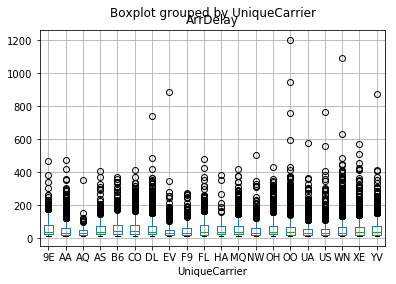

In [25]:
all_airline.loc[all_airline["ArrDelay"] >= 15, :].boxplot(column="ArrDelay", by="UniqueCarrier");

### 3.2.	Construire un graphique qui permet de voir et de comparer facilement l’évolution des quantités mensuelles pour ces deux segments.

## 4.	Questions ouvertes : 

### Quel modèle testeriez-vous en premier pour prédire un futur retard à l'arrivée ? Avec quelles variables ? Comment pourrait-on enrichir ce modèle ?

Votre réponse ici

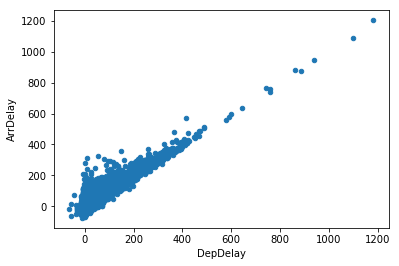

In [50]:
all_airline.plot(kind='scatter', x="DepDelay", y="ArrDelay");

In [51]:
all_airline['DepDelay'].corr(all_airline['ArrDelay'])

0.93454644220249505

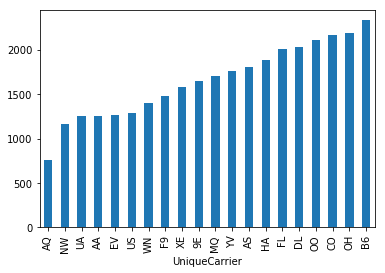

In [55]:
all_airline.groupby("UniqueCarrier")["ArrDelay"].var().sort_values().plot(kind='bar');

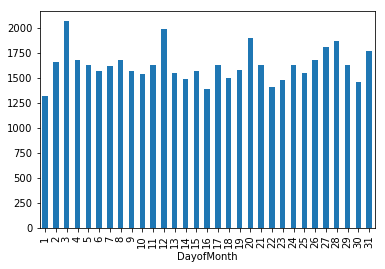

In [57]:
all_airline.groupby("DayofMonth")["ArrDelay"].var().plot(kind='bar');

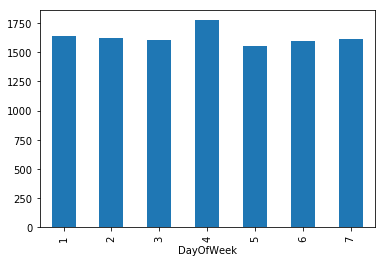

In [58]:
all_airline.groupby("DayOfWeek")["ArrDelay"].var().plot(kind='bar');

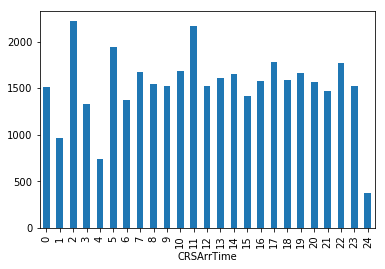

In [59]:
all_airline.groupby(all_airline["CRSArrTime"].apply(lambda x: int(x/100)))["ArrDelay"].var().plot(kind='bar');

In [44]:
df1 = all_airline[["Month", "DayofMonth", "DayOfWeek", "CRSDepTime", "CRSArrTime", "DepDelay", "ArrDelay"]]
df2 = pnd.get_dummies(all_airline[['UniqueCarrier', 'Origin', 'Dest']])
df = pnd.concat([df1, df2], axis=1)
df.head()

,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,DepDelay,ArrDelay,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AQ,...,Dest_TXK,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
0,1,3,4,1955,2225,19.0,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,3,4,2130,2240,19.0,-5.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,4,1050,1325,26.0,34.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,3,4,1315,1755,87.0,84.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,3,4,2125,2225,5.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
pnd.get_dummies(all_airline[['Origin', 'Dest']]).sum(axis=1)

AAABHEIJ50851    2
AAAFYAUV23861    2
AAAVRDXC97303    2
AAAXNTYF50728    2
AAAZFRET38132    2
AAAZLZUF92362    2
AABADXNU11242    2
AABCABOW97650    2
AABECBKW36536    2
AABOFDAW93033    2
AABVDIXF79018    2
AABVTETV51453    2
AABXGPPD42713    2
AACAGRVG72441    2
AACEZLWD21899    2
AACLEZMT98940    2
AACOHJJJ30752    2
AACQUVHA72660    2
AACYFIIP99555    2
AADBVHPR84045    2
AADCOMNC92984    2
AADDKBVF54467    2
AADIRPTN93847    2
AADOOHFW32795    2
AADSJOIT58044    2
AAEACVCF27627    2
AAEFVOHG13866    2
AAELBDMF20939    2
AAEMIMZW22087    2
AAEMVTXM72005    2
                ..
ZZUQUGJH67666    2
ZZURQSAY66302    2
ZZUUFJFE72344    2
ZZUVNKQN40832    2
ZZVQLEFX64653    2
ZZVRNWNM32106    2
ZZVXNEYR36977    2
ZZVYFRRD27823    2
ZZWGKDNN40650    2
ZZWGYOGB76817    2
ZZWQPRMY94838    2
ZZWTNDJM26205    2
ZZWVQTLY88014    2
ZZXCISYT20653    2
ZZXFIQIJ93562    2
ZZXHTHTG61380    2
ZZXSQVEV42333    2
ZZXVLXIL72091    2
ZZXXGCVN91089    2
ZZYDEAOE25965    2
ZZYFTBHD42453    2
ZZYHTHND9979